In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings("ignore")

# Import datasets
nba_attendance = pd.read_csv("Datasets/NBA_Attendance_2019-2023.csv")
wnba_game_attendance = pd.read_csv("Datasets/WNBA Game Attendance.csv")

In [2]:
# Lists of teams we're considering
wnba_teams = ['Atlanta Dreams','Chicago Sky','Dallas Wings','Indiana Fever','Los Angeles Sparks','Phoenix Mercury','Minnesota Lynx','New York Liberty','Las Vegas Aces','Seattle Storm']
nba_teams = ['Atlanta Hawks','Chicago Bulls','Dallas Mavericks','Indiana Pacers','Los Angeles Lakers','Phoenix Suns','Minnesota Timberwolves','New York Knicks','Golden State Warriors','Oklahoma City Thunder']

In [3]:
# Remove rows with no attendance data
wnba_game_attendance.dropna(subset = ["Attendance"], inplace = True)

In [4]:
# Drop duplicate rows
wnba_game_attendance.drop_duplicates(["Year","Date","Location","Attendance"], inplace = True)

In [5]:
# Create dictionary with all games each team played
wnba_team_data = {}
for team in wnba_teams:
    wnba_team_data[team] = wnba_game_attendance.loc[(wnba_game_attendance["Team"] == team) | (wnba_game_attendance["Opponent"] == team)]
    
# Create new dataframe to mat
columns = ["Year",
           "Team",
           "Overall Games",
           "Overall Average",
           "Overall Percent"]

wnba_attendance = pd.DataFrame(columns = columns)
# Go through each team
for team in wnba_team_data:
    team_data = wnba_team_data[team]
    
    # For each team, go through years 2019-2023
    for year in range(2019, 2024):
        cap_sum = 0
        
        # All games that this team played in year
        year_games = team_data[team_data["Year"] == year]
        num_games = year_games.size
        avg_attendance = year_games["Attendance"].mean()
        percent_attendance = year_games["Attendance"].sum() * 100 / year_games["Venue Capacity"].sum()
                
        team_year_data = [year,
                          team,
                          num_games,
                          round(avg_attendance,0),
                          round(percent_attendance,1)]
        
        team_year_data_df = pd.DataFrame([team_year_data], columns = columns)
        
        wnba_attendance = pd.concat([wnba_attendance, team_year_data_df], ignore_index = True)

In [6]:
# Clean resultant dataframe
wnba_attendance.dropna(inplace = True)
wnba_attendance.reset_index(inplace = True)

In [7]:
rankings = {2019:['Washington Mystics','Conneticut Sun','Los Angeles Sparks','Las Vegas Aces','Chicago Sky','Seattle Storm','Minnesota Lynx','Phoenix Mercury','Indiana Fever','Dallas Wings','New York Liberty','Atlanta Dreams'], 
            2020: ['Las Vegas Aces','Seattle Storm','Los Angeles Sparks','Minnesota Lynx','Phoenix Mercury','Chicago Sky','Conneticut Sun','Washington Mystics','Dallas Wings','Atlanta Dreams','Indiana Fever','New York Liberty'], 
            2021: ['Conneticut Sun','Las Vegas Aces','Minnesota Lynx','Seattle Storm','Phoenix Mercury','Chicago Sky','Dallas Wings','New York Liberty','Washington Mystics','Los Angeles Sparks','Atlanta Dreams','Indiana Fever'], 
            2022: ["Las Vegas Aces",'Chicago Sky','Conneticut Sun','Seattle Storm','Washington Mystics','Dallas Wings','New York Liberty','Phoenix Mercury','Minnesota Lynx','Atlanta Dreams','Los Angeles Sparks','Indiana Fever'], 
            2023: ['Las Vegas Aces','New York Liberty','Conneticut Sun','Dallas Wings','Atlanta Dreams','Minnesota Lynx','Washington Mystics','Chicago Sky','Los Angeles Sparks','Phoenix Mercury','Seattle Storm','Indiana Fever']}

# Creat new column called ranking
wnba_attendance.rename(columns = {"index": "Ranking"}, inplace = True)

for row in range(wnba_attendance.shape[0]):
    team = wnba_attendance["Team"][row]
    year = wnba_attendance["Year"][row]
    try:
        wnba_attendance["Ranking"][row] = rankings[year].index(team) + 1
    except ValueError:
        wnba_attendance["Ranking"][row] = "NA"

# Sort dataframe & reset index
wnba_attendance.sort_values(by = ['Year','Ranking'], inplace = True)
wnba_attendance.reset_index(drop = True)

,Ranking,Year,Team,Overall Games,Overall Average,Overall Percent
0,3,2019,Los Angeles Sparks,264,8538.0,68.3
1,4,2019,Las Vegas Aces,160,5754.0,87.2
2,5,2019,Chicago Sky,168,6344.0,57.9
3,6,2019,Seattle Storm,48,8002.0,78.7
4,7,2019,Minnesota Lynx,40,9722.0,63.9
5,8,2019,Phoenix Mercury,40,9425.0,60.0
6,9,2019,Indiana Fever,24,7435.0,44.3
7,10,2019,Dallas Wings,40,7260.0,76.4
8,11,2019,New York Liberty,40,5194.0,73.8
9,2,2021,Las Vegas Aces,72,3030.0,23.4


In [8]:
# Extract team city and assign to new column
wnba_attendance["City"] = ""
for row in range(wnba_attendance.shape[0]):
    wnba_attendance["City"][row] = wnba_attendance["Team"][row].split(' ', 1)[0]
    
    if wnba_attendance["City"][row] == "Las":
        wnba_attendance["City"][row] = "Las Vegas"
    elif wnba_attendance["City"][row] == "Los":
        wnba_attendance["City"][row] = "Los Angeles"
    elif wnba_attendance["City"][row] == "New":
        wnba_attendance["City"][row] = "New York"
    
nba_attendance["City"] = ""
for row in range(nba_attendance.shape[0]):
    nba_attendance["City"][row] = nba_attendance["Team"][row].split(' ', 1)[0]
    
    if nba_attendance["City"][row] == "Las":
        nba_attendance["City"][row] = "Las Vegas"
    elif nba_attendance["City"][row] == "Los":
        nba_attendance["City"][row] = "Los Angeles"
    elif nba_attendance["City"][row] == "New":
        nba_attendance["City"][row] = "New York"
    elif nba_attendance["City"][row] == "Golden":
        nba_attendance["City"][row] = "San Francisco"
    elif nba_attendance["City"][row] == "Oklahoma":
        nba_attendance["City"][row] = "Oklahoma City"

nba_cities = nba_attendance["City"].unique()
wnba_cities = wnba_attendance["City"].unique()
cities = np.union1d(nba_cities, wnba_cities)

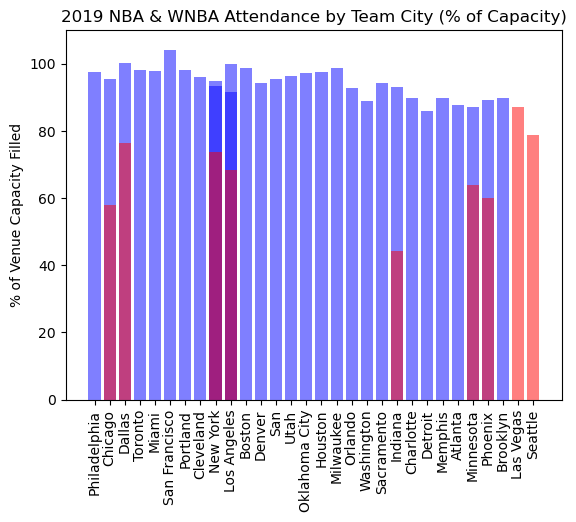

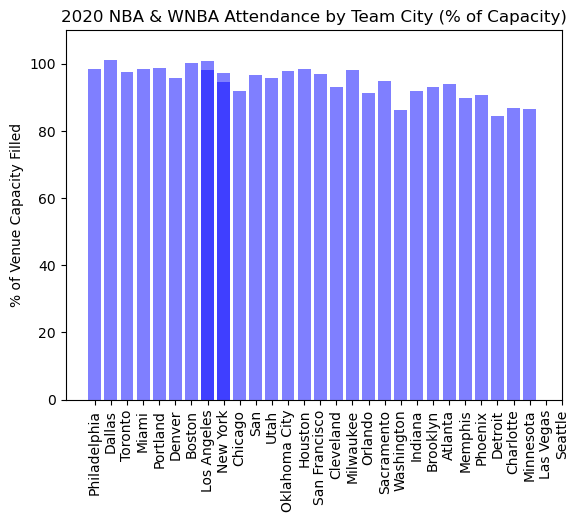

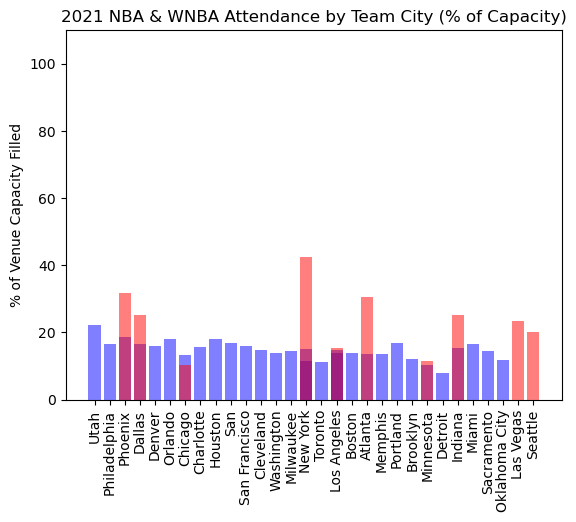

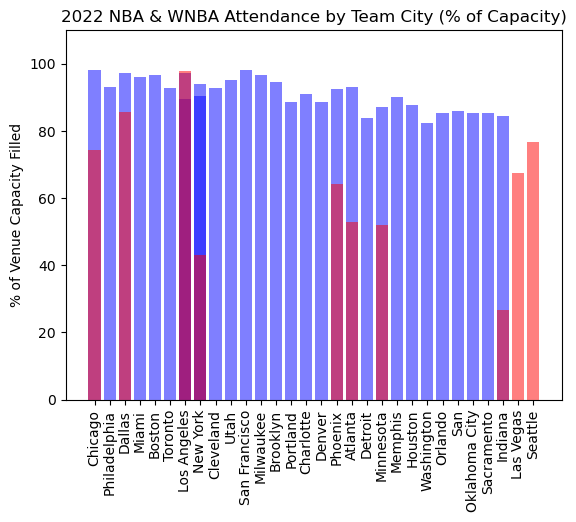

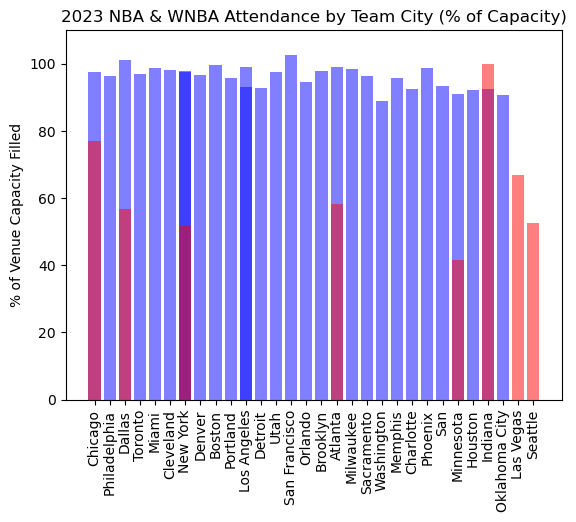

In [18]:
for year in range(2019,2024):
    plt.figure()
    nba_city_teams = nba_attendance[nba_attendance["Year"] == year]["City"] # why is this called teams? now it reps cities, which is almost teams
    nba_overall_percent = nba_attendance[nba_attendance["Year"] == year]["Overall Percent"]
    nba_overall_average = nba_attendance[nba_attendance["Year"] == year]["Overall Average"]
    
    wnba_city_teams = wnba_attendance[wnba_attendance["Year"] == year]["City"]
    wnba_overall_percent = wnba_attendance[wnba_attendance["Year"] == year]["Overall Percent"]
    wnba_overall_average = wnba_attendance[wnba_attendance["Year"] == year]["Overall Average"]
    
    plt.bar(nba_city_teams, nba_overall_percent, color = "blue", alpha = .5)
    plt.bar(wnba_city_teams, wnba_overall_percent, color = "red", alpha = .5)
    plt.ylim(0,110)
    plt.ylabel("% of Venue Capacity Filled")
    plt.title(f"{year} NBA & WNBA Attendance by Team City (% of Capacity)")
    plt.xticks(ticks = cities, rotation = 'vertical')
    plt.show
    plt.savefig(f"./graph_outputs/attendance_percentage_{year}.png")

In [19]:
nba_team_stats = pd.read_csv("Datasets/NBA Team Stats.csv")
wnba_team_stats = pd.read_csv("Datasets/WNBA Team Stats.csv")

for row in range(nba_team_stats.shape[0]):
    two_dig_yr = nba_team_stats["Season"][row][-2:]
    nba_team_stats["Season"][row] = f"20{two_dig_yr}"

for row in range(wnba_team_stats.shape[0]):
    two_dig_yr = wnba_team_stats["Season"][row][-2:]
    wnba_team_stats["Season"][row] = f"20{two_dig_yr}"

In [21]:
nba_team_stats

,Season,Team,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,REB,AST,TOV,STL
0,2020,Atlanta Hawks,67,48.6,111.8,40.6,90.6,44.9,12.0,36.1,33.3,18.5,23.4,79.0,43.3,24.0,16.2,7.8
1,2020,Chicago Bulls,65,48.2,106.8,39.6,88.6,44.7,12.2,35.1,34.8,15.5,20.5,75.5,41.9,23.2,15.5,10.0
2,2020,Dallas Mavericks,75,48.5,117.0,41.7,90.3,46.1,15.1,41.3,36.7,18.6,23.8,77.9,46.9,24.7,12.7,6.1
3,2020,Golden State Warriors,65,48.4,106.3,38.6,88.2,43.8,10.4,31.3,33.4,18.7,23.2,80.3,42.8,25.6,14.9,8.2
4,2020,Indiana Pacers,73,48.3,109.4,42.1,88.5,47.6,10.2,28.0,36.3,15.0,19.1,78.7,42.8,25.9,13.2,7.4
5,2020,Los Angeles Lakers,71,48.1,113.4,42.3,88.3,48.0,11.0,31.6,34.9,17.7,24.3,72.9,45.7,25.4,15.2,8.6
6,2020,Minnesota Timberwolves,64,48.6,113.3,40.4,91.6,44.1,13.3,39.7,33.6,19.1,25.4,75.3,44.8,23.8,15.3,8.7
7,2020,New York Knicks,66,48.4,105.8,40.0,89.3,44.7,9.6,28.4,33.7,16.3,23.5,69.4,46.5,22.1,14.3,7.6
8,2020,Oklahoma City Thunder,72,48.4,110.4,40.0,85.5,46.8,10.7,30.2,35.5,19.8,24.8,79.6,42.9,21.7,13.7,7.6
9,2020,Phoenix Suns,73,48.2,113.6,41.2,88.1,46.8,11.4,31.8,35.8,19.9,23.8,83.4,43.5,27.2,14.8,7.7


In [25]:
# pts
# NBA
nba_attendance["PTS Avg"] = ""

for row in range(nba_attendance.shape[0]):
    year = nba_attendance["Year"][row]
    teams = nba_attendance["Team"].unique()
    for team in teams:
        nba_attendance["PTS Avg"][row] = nba_team_stats[nba_team_stats["Season"] == year & 
                                                   nba_team_stats["Team"] == team]["PTS"]

# for year in range(2019,2024):
#     plt.figure()
#     nba_city_teams = nba_attendance[nba_attendance["Season"] == year]["City"]
#     nba_pts_ave = nba_attendance[nba_attendance["Year"] == year]["Overall Percent"]
    
#     wnba_city_teams = wnba_attendance[wnba_attendance["Year"] == year]["City"]
#     wnba_overall_percent = wnba_attendance[wnba_attendance["Year"] == year]["Overall Percent"]
#     wnba_overall_average = wnba_attendance[wnba_attendance["Year"] == year]["Overall Average"]
    
#     plt.bar(nba_teams, nba_overall_percent, color = "blue", alpha = .5)
#     plt.bar(wnba_teams, wnba_overall_percent, color = "red", alpha = .5)
#     plt.ylim(0,110)
#     plt.title(f"{year} NBA & WNBA Attendance by Team City (% of Capacity)")
#     plt.xticks(ticks = cities, rotation = 'vertical')
#     plt.show
#     plt.savefig(f"./graph_outputs/attendance_percentage_{year}.png")    
    
# 3pm
# ast

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]